In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# 1. Data

Indentity Shape: (144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


transaction Shape: (590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Proporción de créditos Fraudulentos


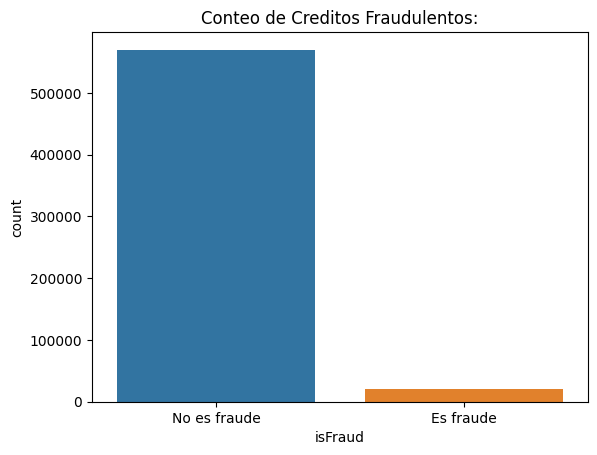

In [2]:
índentity = pd.read_csv("C:\Users\mcast\OneDrive\Escritorio\ParcialML\train_identity.csv")
transaction = pd.read_csv("C:\Users\mcast\OneDrive\Escritorio\ParcialML\train_transaction.csv")
print(f"Indentity Shape: {índentity.shape}")
display(índentity.head())
print("==" * 20)
print(f"transaction Shape: {transaction.shape}")
display(transaction.head())


mapeo_fraude = {0: 'No es fraude', 1: 'Es fraude'}

transaction['isFraud'] = transaction['isFraud'].map(mapeo_fraude)

print("")
print("Proporción de créditos Fraudulentos")

sns.countplot(x='isFraud', data=transaction)
plt.title('Conteo de Creditos Fraudulentos:')
plt.show()

La barra correspondiente a "No es fraude" es la más alta, lo que indica que la mayoría de los créditos en el conjunto de datos no son fraudulentos. La categoría "Es fraude" tiene una barra mucho más baja, lo que sugiere que hay una cantidad significativamente menor de créditos fraudulentos en comparación con los no fraudulentos.

# 2. Missing Values

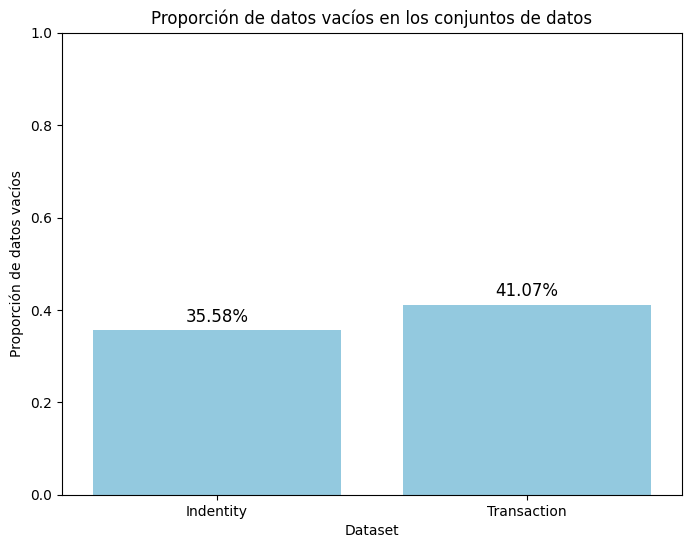

In [3]:
proporcion_datos_vacios_identity = índentity.isna().mean()
proporcion_datos_vacios_transaction= transaction.isna().mean()
data = {
    'Dataset': ['Indentity', 'Transaction'],
    'Proporción de datos vacíos': [proporcion_datos_vacios_identity.mean(), proporcion_datos_vacios_transaction.mean()]
}

df_proporcion_vacios = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Dataset', y='Proporción de datos vacíos', data=df_proporcion_vacios, color='skyblue')
plt.title('Proporción de datos vacíos en los conjuntos de datos')
plt.ylim(0, 1)  

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()


Podemos observar que ambos conjuntos tienen una cantidad considerable de datos vacíos: "Identity" tiene un 35.58% de datos vacíos, mientras que "Transaction" tiene un 41.07%.

# TransactionDT

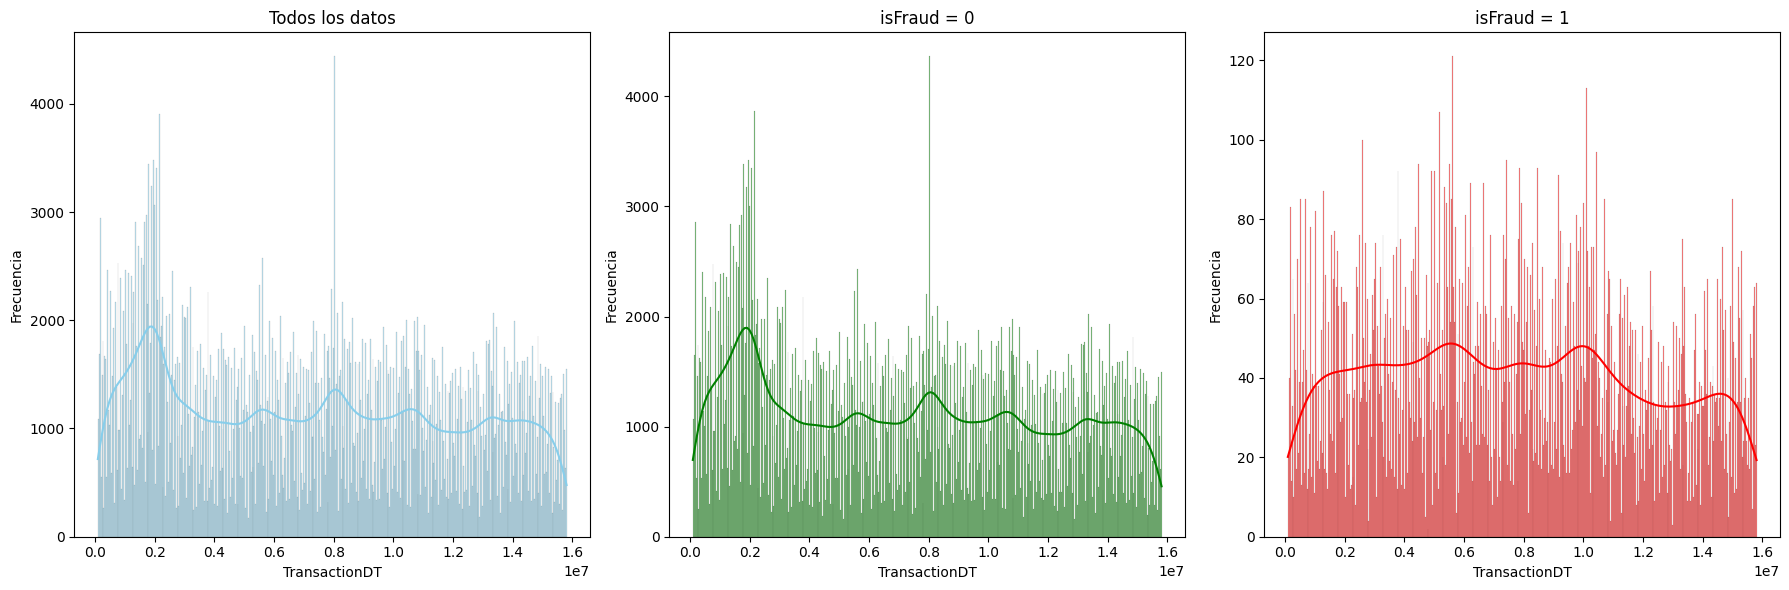

In [4]:
# Crear una cuadrícula de subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma con todos los datos
sns.histplot(transaction["TransactionDT"], bins=500, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Todos los datos')
axes[0].set_xlabel('TransactionDT')
axes[0].set_ylabel('Frecuencia')

# Histograma donde la columna isFraud = 0
sns.histplot(transaction[transaction["isFraud"] == 'No es fraude']["TransactionDT"], bins=500, kde=True, color='green', ax=axes[1])
axes[1].set_title('isFraud = 0')
axes[1].set_xlabel('TransactionDT')
axes[1].set_ylabel('Frecuencia')

# Histograma donde la columna isFraud = 1
sns.histplot(transaction[transaction["isFraud"] == 'Es fraude']["TransactionDT"], bins=500, kde=True, color='red', ax=axes[2])
axes[2].set_title('isFraud = 1')
axes[2].set_xlabel('TransactionDT')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()  # Ajustar automáticamente el diseño
plt.show()



1. **Todos los datos:** Hay picos claros y valles que sugieren patrones temporales o cíclicos en los datos. Estos podrían corresponder a horarios de alta actividad como las horas del día o días específicos de la semana.

2. **isFraud = 0:** Este sigue un patrón similar al del gráfico de todos los datos, lo que tiene sentido ya que las transacciones legítimas constituyen la mayoría de los datos y, por lo tanto, dominan el patrón general observado.

3. **isFraud = 1:** La escala del eje y es mucho menor en comparación con los otros dos gráficos, lo que refleja la menor frecuencia de casos de fraude en el conjunto de datos. Los picos aquí parecen menos pronunciados y el patrón temporal puede diferir del de las transacciones legítimas. 

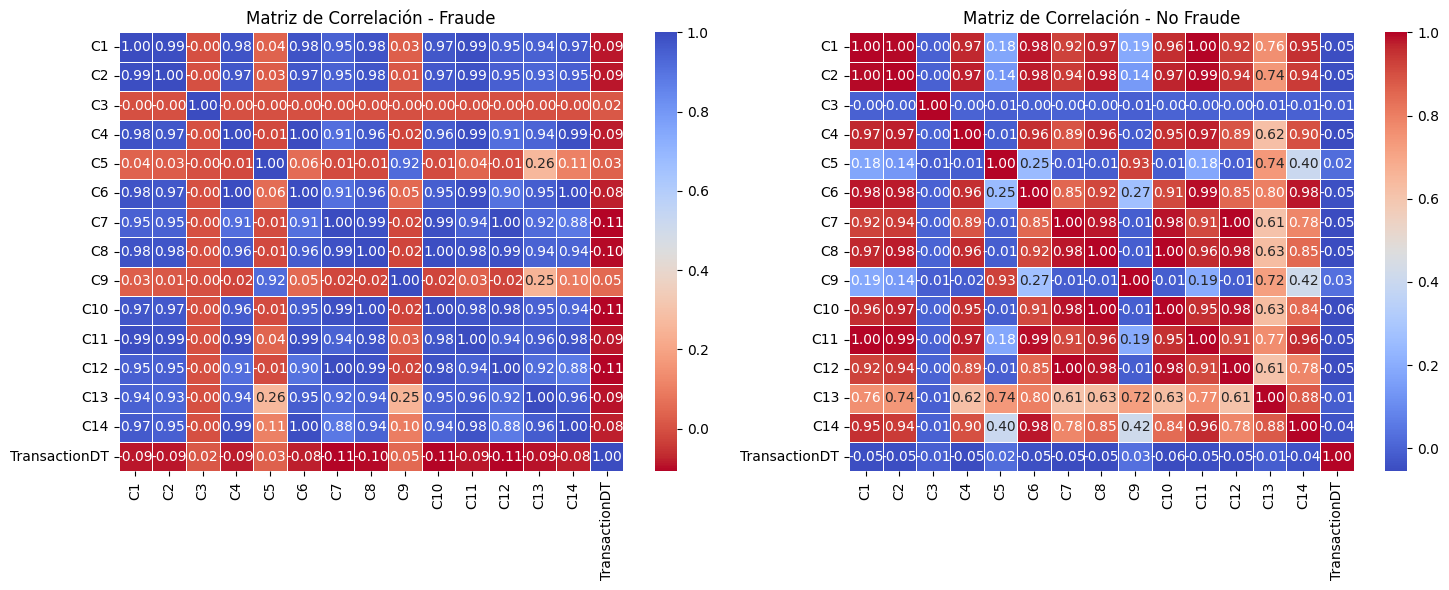

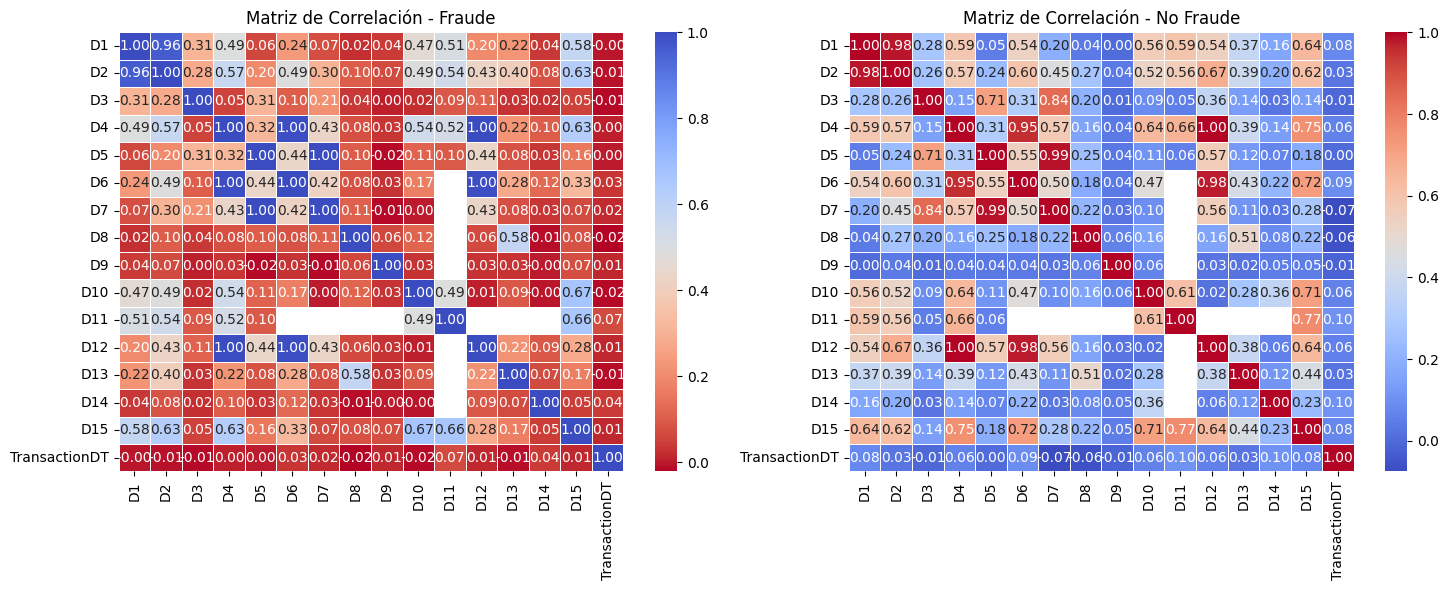

In [5]:
def Plot_corr(lista):

    tra = transaction[lista]
    corrmat_fraud = tra[tra["isFraud"] == "Es fraude"].iloc[:, :(tra.shape[1] - 1)].corr()
    corrmat_Not_fraud = tra[tra["isFraud"] == "No es fraude"].iloc[:, :(tra.shape[1] - 1)].corr()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.heatmap(corrmat_fraud, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=.5, ax=axes[0])
    axes[0].set_title(f'Matriz de Correlación - Fraude')
    sns.heatmap(corrmat_Not_fraud, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
    axes[1].set_title(f'Matriz de Correlación - No Fraude')

    plt.tight_layout()
    plt.show()
    
# C-Variables  
    
lista = [f"C{i}" for i in range(1, 15)]
lista.append("TransactionDT")
lista.append("isFraud")
    
Plot_corr(lista)

lista = [f"D{i}" for i in range(1, 16)]
lista.append("TransactionDT")
lista.append("isFraud")

Plot_corr(lista)

In [6]:
card= [f"card{i}" for i in range(1,7)]
cards=transaction[card]
cards

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,NaN,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


# Cards

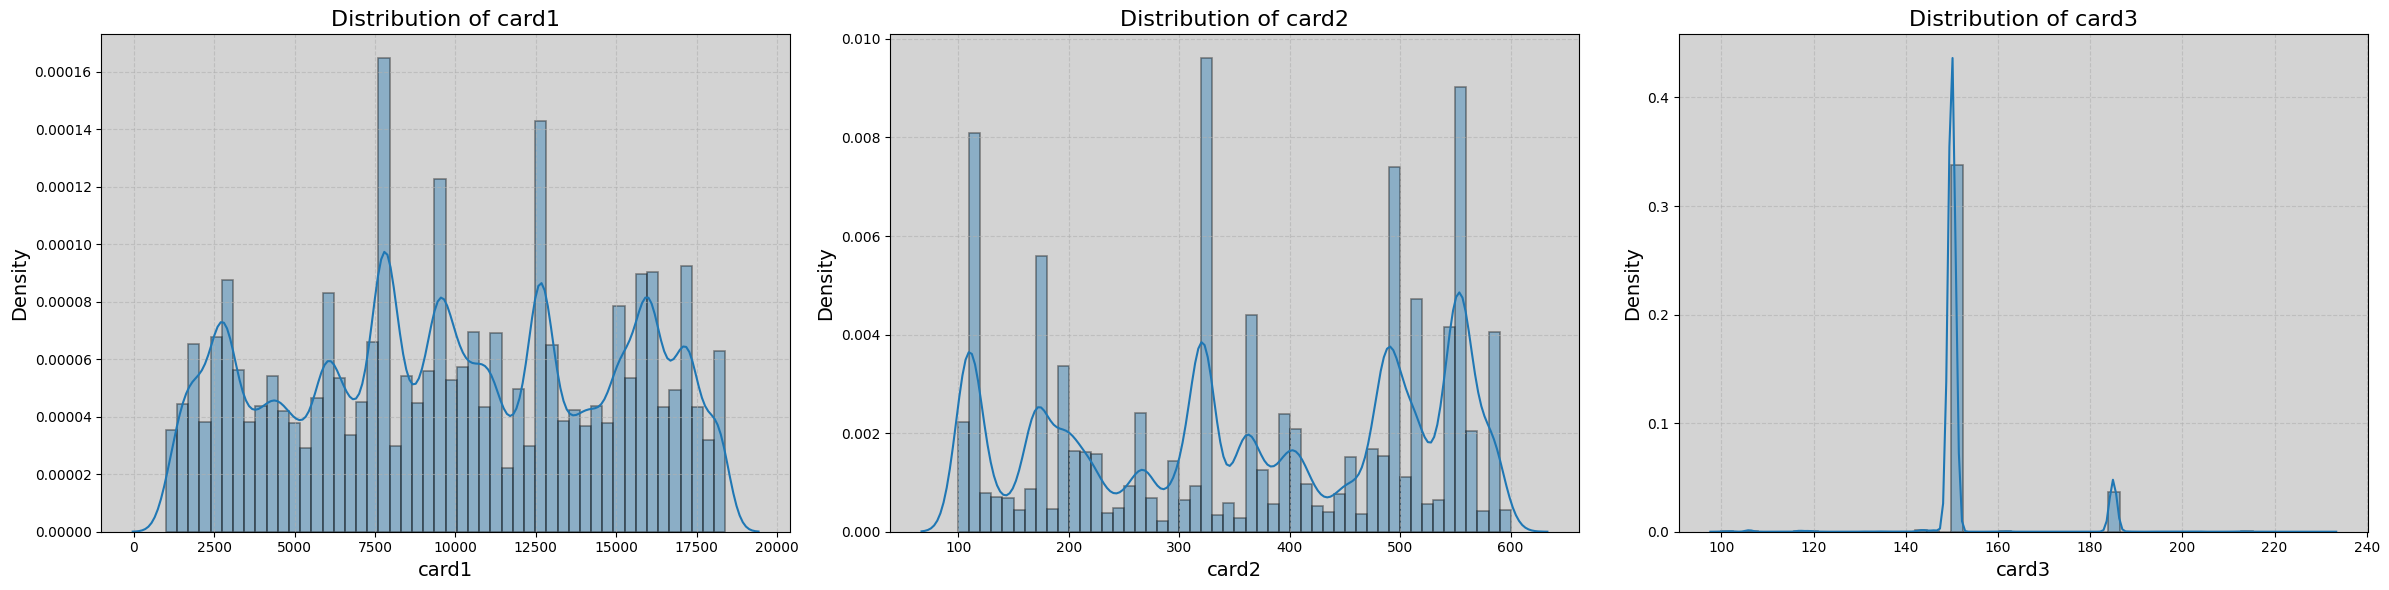

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

for i in range(0, 3):
    # Customizing displot
    sns.distplot(cards.iloc[:, i], bins=50, ax=axes[i], hist_kws={'edgecolor': 'black', 'linewidth': 1.2}, kde= True)

    # Adding titles and labels
    axes[i].set_title('Distribution of ' + cards.iloc[:, i].name, fontsize=16)
    axes[i].set_xlabel(cards.iloc[:, i].name, fontsize=14)
    axes[i].set_ylabel('Density', fontsize=14)

    # Adding grid
    axes[i].grid(True, linestyle='--', alpha=0.6)

    # Adding a background color
    axes[i].set_facecolor('lightgray')

plt.tight_layout()
plt.show()


**Distribución de card1:** Este histograma muestra una distribución bastante uniforme con múltiples picos, lo que indica que los valores para la card1 están distribuidos a lo largo de un amplio rango de cantidades. Hay varios picos notables que sugieren que ciertas cantidades ocurren con más frecuencia que otras.

**Distribución de card2:** El histograma para la card2 revela una distribución más irregular con varios picos agudos, lo que podría sugerir que hay cantidades de transacciones que son muy populares y posiblemente algunas cantidades que son menos comunes.

**Distribución de card3:** El histograma para la card3 es bastante diferente de los dos primeros. Muestra un pico muy fuerte en un valor particular, lo que podría implicar que la mayoría de las transacciones para la card3 son de una cantidad única, con muy pocas transacciones de otras cantidades. Hay un pico más pequeño en un valor más alto también, indicando una cantidad común secundaria, pero es mucho menos frecuente que la principal.


In [8]:
for  i in cards:
    print ("Unique ",i, " = ",transaction[i].nunique())

Unique  card1  =  13553
Unique  card2  =  500
Unique  card3  =  114
Unique  card4  =  4
Unique  card5  =  119
Unique  card6  =  4


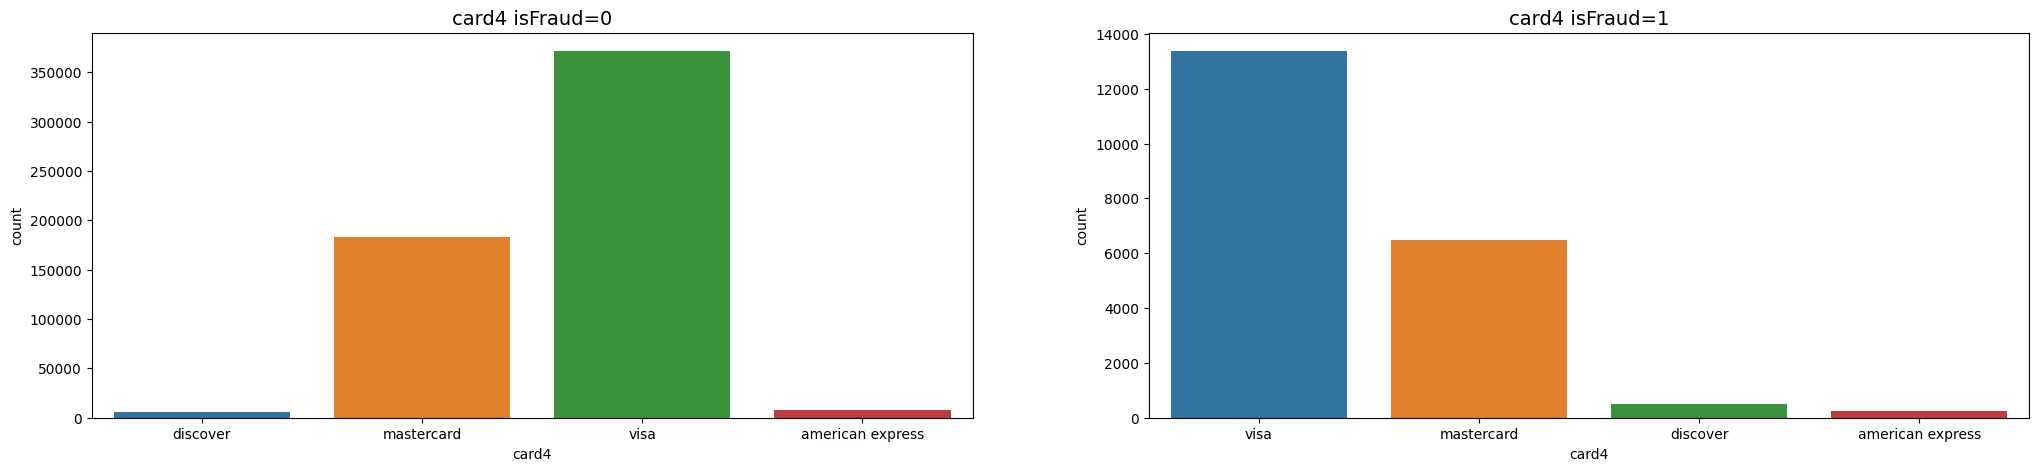

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=transaction.loc[transaction['isFraud'] == "No es fraude"])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=transaction.loc[transaction['isFraud'] == "Es fraude"])
ax[1].set_title('card4 isFraud=1', fontsize=14)
plt.show()

**card4 isFraud=0:** Este diagrama muestra que las transacciones no fraudulentas están dominadas por Visa, seguida por Mastercard, y luego Discover, con American Express siendo la menos utilizada entre las presentadas. La barra de Visa es significativamente más alta que las demás, lo que indica una gran cantidad de transacciones legítimas con tarjetas Visa.

**card4 isFraud=1:** Visa y Mastercard son considerablemente más altas que Discover y American Express, lo cual indica que la mayoría de las transacciones fraudulentas se realizaron con Visa y Mastercard.


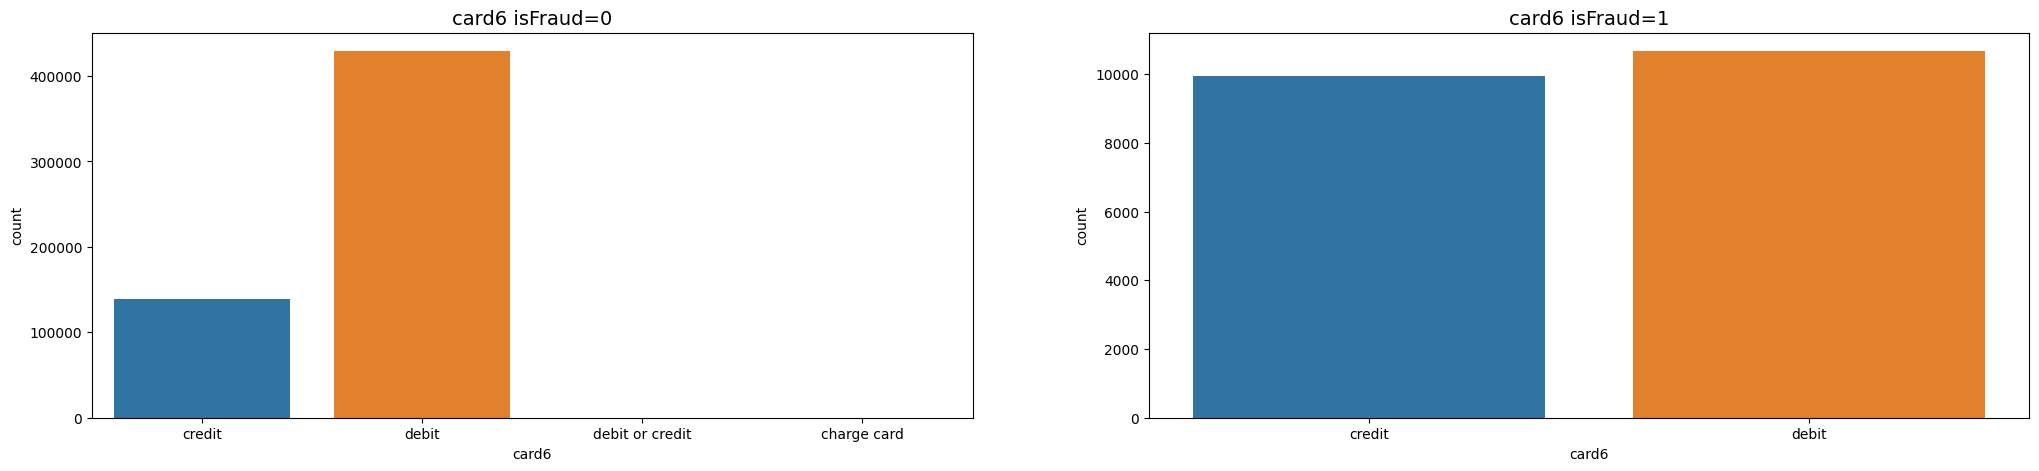

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="card6", ax=ax[0], data=transaction.loc[transaction['isFraud'] == "No es fraude"])
ax[0].set_title('card6 isFraud=0', fontsize=14)
sns.countplot(x="card6", ax=ax[1], data=transaction.loc[transaction['isFraud'] == "Es fraude"])
ax[1].set_title('card6 isFraud=1', fontsize=14)
plt.show()

**card6 isFraud=0:** En el primer gráfico, se muestra que la mayoría de las transacciones no fraudulentas se realizan con tarjetas de débito, seguidas por las de crédito. La categoría "debit or credit" y "charge card" tienen una representación mucho menor. Esto sugiere que las tarjetas de débito son mucho más utilizadas para transacciones legítimas en este conjunto de datos.

**card6 isFraud=1:** El segundo gráfico, que representa las transacciones marcadas como fraudulentas, muestra un patrón similar con la mayoría de las transacciones fraudulentas realizadas con tarjetas de débito. Las tarjetas de crédito también tienen una participación significativa en el fraude, aunque ligeramente menor que las de débito.

# Preprocessing 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
columns_part_1 = ["C3", "C5", "C9"]
columns_part_2 = ["D1", "D2", "D12", "D4", "D6", "D10", "D11", "D8"] #D15


In [13]:
transaction.addr1.isna().sum() / len(transaction.dist1)

0.1112642666034477

In [14]:
transaction.columns[:50]

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4'],
      dtype='object')

In [15]:
transaction.isna().sum()[:50].sort_values()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
C9                     0
C12                    0
C8                     0
C7                     0
C5                     0
C6                     0
C4                     0
C3                     0
C2                     0
C1                     0
C14                    0
C13                    0
C10                    0
C11                    0
D1                  1269
card3               1565
card6               1571
card4               1577
card5               4259
card2               8933
addr1              65706
addr2              65706
D10                76022
D15                89113
P_emaildomain      94456
D4                168922
D3                262878
M2                271100
M3                271100
M1                271100
D11               279287
D2                280797
M4                281444
D5                309841


In [16]:
data = transaction[["TransactionDT",
                     "TransactionAmt",
                     "card1",
                     "card2",
                     "card3",
                     "card4",
                     "card6",
                     "C3",
                     "C5",
                     "C9",
                     "D1",
                     "D10",
                     "isFraud"
                    ]]
data = pd.get_dummies(data)

In [17]:
data= data.drop(["card6_charge card", "card6_debit", "card6_debit or credit", "isFraud_No es fraude"], axis=1)
data

,TransactionDT,TransactionAmt,card1,card2,card3,C3,C5,C9,D1,D10,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,isFraud_Es fraude
0,86400,68.50,13926,NaN,150.0,0.0,0.0,1.0,14.0,13.0,False,True,False,False,True,False
1,86401,29.00,2755,404.0,150.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False
2,86469,59.00,4663,490.0,150.0,0.0,0.0,1.0,0.0,0.0,False,False,False,True,False,False
3,86499,50.00,18132,567.0,150.0,0.0,0.0,1.0,112.0,84.0,False,False,True,False,False,False
4,86506,50.00,4497,514.0,150.0,0.0,0.0,0.0,0.0,NaN,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,15811047,49.00,6550,NaN,150.0,0.0,1.0,2.0,29.0,56.0,False,False,False,True,False,False
590536,15811049,39.50,10444,225.0,150.0,0.0,0.0,1.0,0.0,0.0,False,False,True,False,False,False
590537,15811079,30.95,12037,595.0,150.0,0.0,1.0,1.0,0.0,0.0,False,False,True,False,False,False
590538,15811088,117.00,7826,481.0,150.0,0.0,0.0,2.0,22.0,22.0,False,False,True,False,False,False


In [18]:
data.isna().sum()[:50].sort_values() / len(data)

TransactionDT             0.000000
TransactionAmt            0.000000
card1                     0.000000
C3                        0.000000
C9                        0.000000
C5                        0.000000
card4_american express    0.000000
card4_discover            0.000000
card6_credit              0.000000
isFraud_Es fraude         0.000000
card4_visa                0.000000
card4_mastercard          0.000000
D1                        0.002149
card3                     0.002650
card2                     0.015127
D10                       0.128733
dtype: float64

In [19]:

negative_samples = data[data["isFraud_Es fraude"] == False].sample(frac=0.05, random_state=42)
positive_samples = data[data["isFraud_Es fraude"] == True]
balanced_data = pd.concat([negative_samples, positive_samples]).reset_index(drop = True)

print("Forma del DataFrame balanceado:", balanced_data.shape)

print("Primeras filas del DataFrame balanceado:")
display(balanced_data.head())


Forma del DataFrame balanceado: (49157, 16)
Primeras filas del DataFrame balanceado:


,TransactionDT,TransactionAmt,card1,card2,card3,C3,C5,C9,D1,D10,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,isFraud_Es fraude
0,5151894,25.00,8406,264.0,150.0,0.0,0.0,0.0,0.0,NaN,False,False,False,True,False,False
1,4202454,200.00,18080,111.0,150.0,0.0,0.0,0.0,24.0,NaN,False,False,True,False,True,False
2,869878,146.00,8406,264.0,150.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,False
3,783090,57.95,11218,579.0,150.0,0.0,1.0,3.0,403.0,488.0,False,False,False,True,False,False
4,1479490,49.00,12570,462.0,150.0,0.0,0.0,3.0,39.0,38.0,False,False,False,True,False,False


In [20]:
balanced_data.dropna(inplace = True)

In [21]:
y = balanced_data["isFraud_Es fraude"]
X = balanced_data.drop("isFraud_Es fraude", axis = 1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

# Define tus conjuntos de datos X_train, X_test, y_train, y_test aquí
# Por ejemplo:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

pipelines = {
    'knn': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression(max_iter=10000))
    ])
}

param_grid = {
    'knn': {
        'knn__n_neighbors': [3, 5, 7, 9],
    },
    'logistic_regression': {
        'logistic_regression__C': [0.1, 1, 10, 100]
    }
}

# Paso 5: Ejecutar GridSearchCV para cada modelo y construir la tabla de error
results = []

for model in tqdm(pipelines):
    grid_search = GridSearchCV(pipelines[model], param_grid[model], cv=StratifiedKFold(n_splits=5), scoring='roc_auc', verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Evaluar los modelos en el conjunto de prueba
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Recopilar las métricas de interés
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Model': model,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc
    })

# Construir la tabla de error
error_table = pd.DataFrame(results)
error_table


  0%|          | 0/2 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


,Model,Precision,Recall,F1-score,AUC
0,knn,0.724789,0.786850,0.754545,0.793158
1,logistic_regression,0.709753,0.554128,0.622360,0.701017


En comparación, el modelo knn supera al modelo de regresión logística en todas las métricas presentadas. Tiene una precisión, recuerdo, F1-score y AUC más altos, lo que indica que es un modelo más eficaz para la detección de fraude crediticio según estas métricas